<a href="https://colab.research.google.com/github/flohmannjr/Carvana-Predict-Car-Prices/blob/main/Carvana_Predict_Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carvana - Predict Car Prices

https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices

# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Setup

In [2]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

plt.style.use('seaborn-darkgrid')

In [3]:
SEED = 2008193

In [4]:
def get_metrics(y_test, y_pred):

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return {'Mean Absolute Error': mae,
            'Root Mean Squared Error': rmse,
            'Mean Absolute Percentage Error': mape}

# Data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/flohmannjr/Carvana-Predict-Car-Prices/main/carvana.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


## Preprocessing

In [7]:
df['Year'] = df['Year'].astype(str).str[:4].astype(int)

In [8]:
df.duplicated().sum()

12682

**More than half of the data is duplicated (12682/22000). If not fixed, the models will overfit.**

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
name = df['Name'].str.split()

df['Manufacturer'] = name.str[0]
df['Model']        = name.str[1:].str.join(' ')

df['Manufacturer'] = df['Manufacturer'].astype('category').cat.codes
df['Model']        = df['Model'].astype('category').cat.codes

In [11]:
df.drop('Name', axis=1, inplace=True)

## Checking

In [12]:
df[:5]

,Year,Miles,Price,Manufacturer,Model
0,2018,41946,16990,6,350
1,2020,45328,23990,11,338
2,2012,81068,21590,17,370
3,2019,35372,21590,17,265
4,2017,68992,22990,3,372


In [13]:
df['Year'].value_counts()

2016    1077
2017    1075
2015     977
2018     968
2019     941
2020     907
2021     817
2014     810
2013     638
2012     440
2022     278
2011     202
2010     133
2009      52
2023       3
Name: Year, dtype: int64

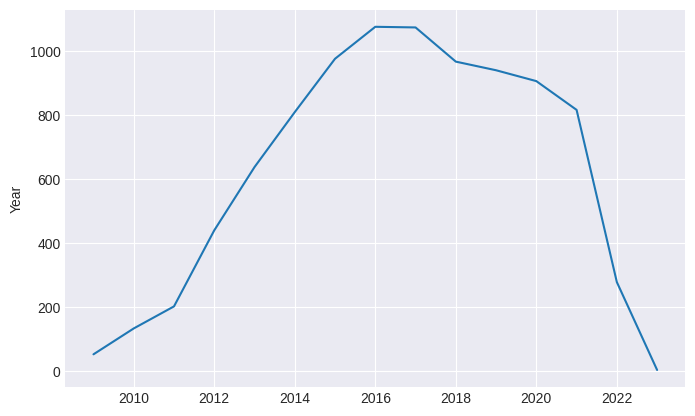

In [14]:
sns.lineplot(data=df['Year'].value_counts());

## Train and test split and scaling

In [15]:
X = df.drop('Price', axis=1)
y = df['Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [17]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [18]:
%%time

rfr = RandomForestRegressor(n_estimators=200, bootstrap=True, oob_score=True, warm_start=True, random_state=SEED)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

metrics = get_metrics(y_test, y_pred)

CPU times: user 5.34 s, sys: 124 ms, total: 5.46 s
Wall time: 7.08 s


In [19]:
metrics

{'Mean Absolute Error': 2197.1060539610157,
 'Root Mean Squared Error': 4332.780607510014,
 'Mean Absolute Percentage Error': 0.09135459673995282}